In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import fct_utiles as fct
import CNN

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

## 0 - Initialisation

In [8]:
# Téléchargement et décompression des données
fct.ensure_data_loaded()

Datas already downloaded.
Datas are successfully loaded.



In [21]:
# Choix des thèmes
# objets = ['apple', 'forest', 'crocodile', 'baby', 'bus', 'chair','hamster']
raw_path = fct.RAW_LOCAL_PATH + 'cifar-100/train/'
objets = []
for root, dirs, files in os.walk(raw_path) :
    for objet in dirs :
        objets.append(objet)

In [31]:
start = datetime.now()
fct.png_to_csv(objets, 300)
end = datetime.now()
print (f'Conversion effectuée en {end - start}')

All png files convert to a csv file.
Conversion effectuée en 0:08:08.455698


In [36]:
start = datetime.now()
modelPath, training = CNN.train_model('model_full_30', objets)
end = datetime.now()
print (f'Entrainement effectué en {end - start}')

32000 train samples
8000 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_5 (Dropo

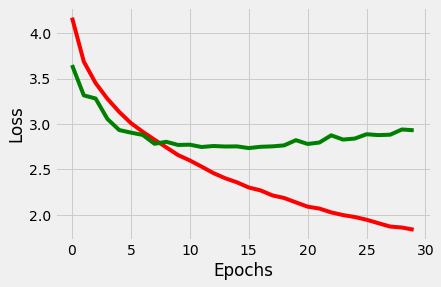

In [37]:
CNN.plot(training)

Correct: 2489
Incorrect: 5511


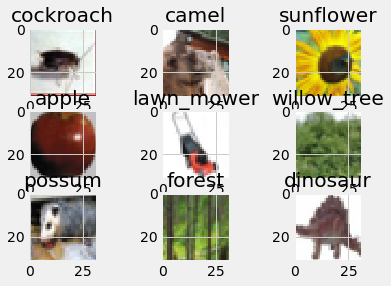

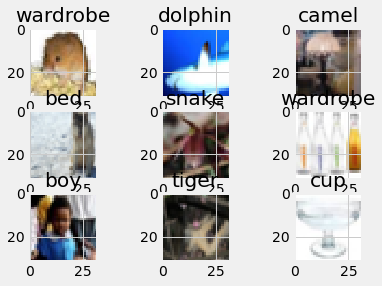

In [38]:
CNN.computer_metrics(modelPath, objets)